# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.offline as pyo
from termcolor import cprint
import plotly.express as px
import seaborn as sns
import warnings

import warnings
warnings.filterwarnings('ignore')

# **Basic Understanding of The Data**

In [2]:
# Import Data & show sample

df = pd.read_csv('/content/marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
40,40,8601,1980,S1,Menikah,80011000.0,0,1,29-04-2013,3,...,4,0,0,0,0,0,0,3,11,0
337,337,4099,1972,S1,Menikah,30675000.0,1,0,12-11-2012,14,...,8,0,0,0,0,0,0,3,11,0
1856,1856,6710,1951,S2,Lajang,58217000.0,2,1,17-11-2012,84,...,6,0,0,0,0,0,0,3,11,0
669,669,7426,1971,D3,Menikah,54690000.0,1,1,07-11-2013,76,...,3,0,0,0,0,0,0,3,11,0
1517,1517,6310,1978,S1,Menikah,33039000.0,1,0,09-09-2013,4,...,5,0,0,0,0,0,0,3,11,0


# **Data Exploration**

In [3]:
# Show Data Rows & Features Number

print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 2240
Total Features : 30


In [4]:
# Check duplicated value
df.duplicated().sum()

0

In [5]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"


Dari informasi diatas:
- Terdapat null value pada kolom Income sebanyak 24 baris
- Kolom Dt_Customer memiliki data type yang kurang sesuai sehingga perlu dilakukan perubahan dari object/str ke tipe datetime

# **Data Preprocessing**

In [6]:
# Initate df_clean
df_clean = df.copy()

# **Feature Engineering**

## **Feature extraction (Add New Features)**

In [7]:
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'])

# age
df_clean['age'] = 2022 - df_clean['Year_Birth']

# children
df_clean['children'] = df_clean['Kidhome'] + df_clean['Teenhome']

# total spending
df_clean['totalspending'] =  df_clean['MntCoke'] \
                      + df_clean['MntFruits'] \
                      + df_clean['MntMeatProducts'] \
                      + df_clean['MntFishProducts'] \
                      + df_clean['MntSweetProducts'] \
                      + df_clean['MntGoldProds']

# total transaction
df_clean['totaltransaction'] = df_clean['NumWebPurchases'] \
                        + df_clean['NumCatalogPurchases'] \
                        + df_clean['NumStorePurchases'] \
                        + df_clean['NumDealsPurchases']

#create conversion rate feature
def cvr(x,y):
    if y == 0:
        return 0
    return x / y
df_clean['conversion_rate'] = df_clean.apply(lambda x: cvr(x['totaltransaction'],x['NumWebVisitsMonth']), axis=1)

# is parent
df_clean['is_parent'] = np.where(df_clean['children']>0, 1, 0)

# total accepted campaign
df_clean['acceptcampaign'] = df_clean['AcceptedCmp3'] \
                      + df_clean['AcceptedCmp4'] \
                      + df_clean['AcceptedCmp5'] \
                      + df_clean['AcceptedCmp1'] \
                      + df_clean['AcceptedCmp2']

# Membership duration
df_clean['member_duration']= 2022 - df_clean['Dt_Customer'].dt.year

#create age group
age_list=[]
for i in df_clean['age']:
    if i >= 0 and i <= 1:
        group = 'Infant'
    elif i >= 2 and i <= 4:
        group = 'Toddler'
    elif i >= 5 and i <= 12:
        group = 'Child'
    elif i >= 13 and i <= 19:
        group = 'Teen'
    elif i >= 20 and i <= 39:
        group = 'Adult'
    elif i >= 40 and i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_list.append(group)
df_clean['Age_Group'] = age_list

df_clean.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,age,children,totalspending,totaltransaction,conversion_rate,is_parent,acceptcampaign,member_duration,Age_Group
877,877,10602,1983,S1,Menikah,39922000.0,1,0,2013-02-14,30,...,0,39,1,156000,9,1.125000,1,0,9,Adult
778,778,2461,1955,S2,Lajang,51124000.0,1,1,2013-12-18,79,...,0,67,2,43000,6,2.000000,1,0,9,Senior Citizen
1655,1655,1834,1978,S2,Lajang,35544000.0,1,0,2014-08-03,77,...,0,44,1,67000,6,0.857143,1,0,8,Middle Aged
1417,1417,10341,1948,S1,Bertunangan,51315000.0,0,0,2014-02-23,45,...,0,74,0,222000,10,5.000000,0,0,8,Senior Citizen
1851,1851,11148,1975,S1,Bertunangan,22280000.0,1,0,2013-05-19,85,...,0,47,1,13000,4,0.500000,1,0,9,Middle Aged


## **Drop Unnecessary Features for EDA**

In [8]:
df_clean.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

# **Exploratory Data Analysis**

In [9]:
df_eda = df_clean.copy()

### **Numeric Features**

In [10]:
# Numeric Statistic Value
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,3.530300e+07,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.000000e+00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.000000e+00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,2.400000e+01,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,2.375000e+04,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1.000000e+03,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,1.600000e+04,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3.000000e+03,12000.0,50000.00,259000.0
MntSweetProducts,2240.0,2.706295e+04,4.128050e+04,0.0,1.000000e+03,8000.0,33000.00,263000.0
MntGoldProds,2240.0,4.402188e+04,5.216744e+04,0.0,9.000000e+03,24000.0,56000.00,362000.0


### **Categorical Features**

In [11]:
# Categorical Statistic Value
df_clean.describe(include = 'O').T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Age_Group,2240,3,Middle Aged,1240


## **Univariate Analysis**

In [12]:
df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'children', 'acceptcampaign']] = df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'children', 'acceptcampaign']].astype('object')

In [13]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
dat = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cat.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        num.append(col)
    else:
        dat.append(col)

### **Box Plot**

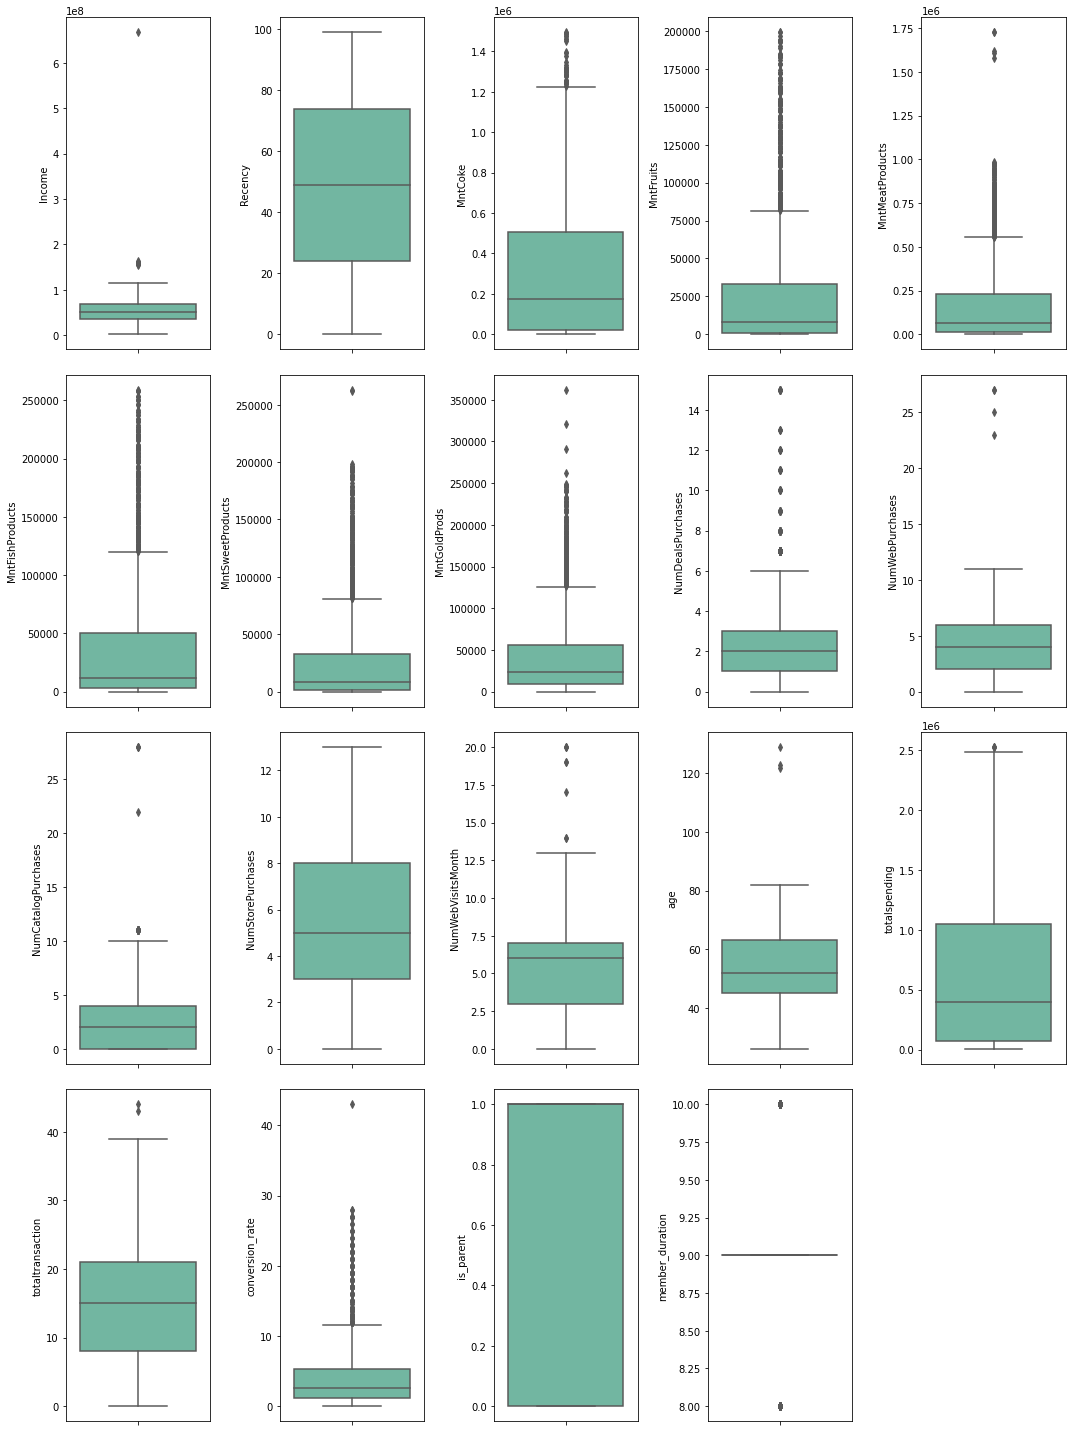

In [14]:
# boxplot visualization for numerical data

plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df_eda[num[i]], orient='v', palette="Set2")
    plt.tight_layout()

plt.show()

### **Distribution Plot**

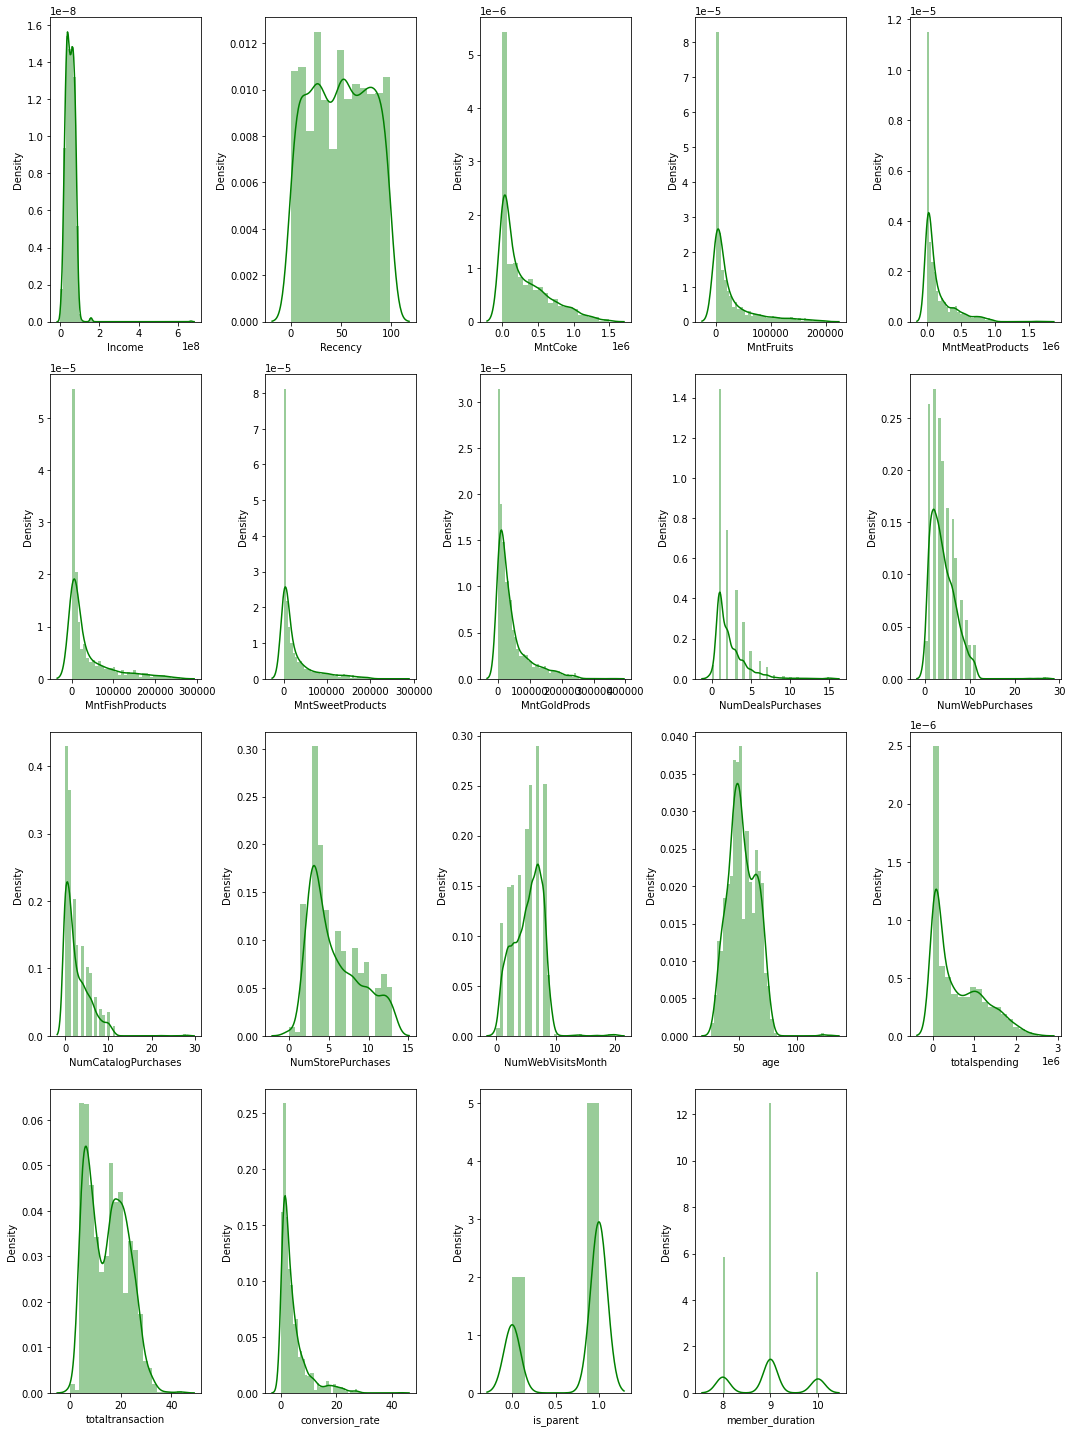

In [15]:
# distribution plot for numerical data

plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(4, 5,i+1)
    sns.distplot(df_eda[num[i]], color='green')
    plt.tight_layout()

### **Count Plot**

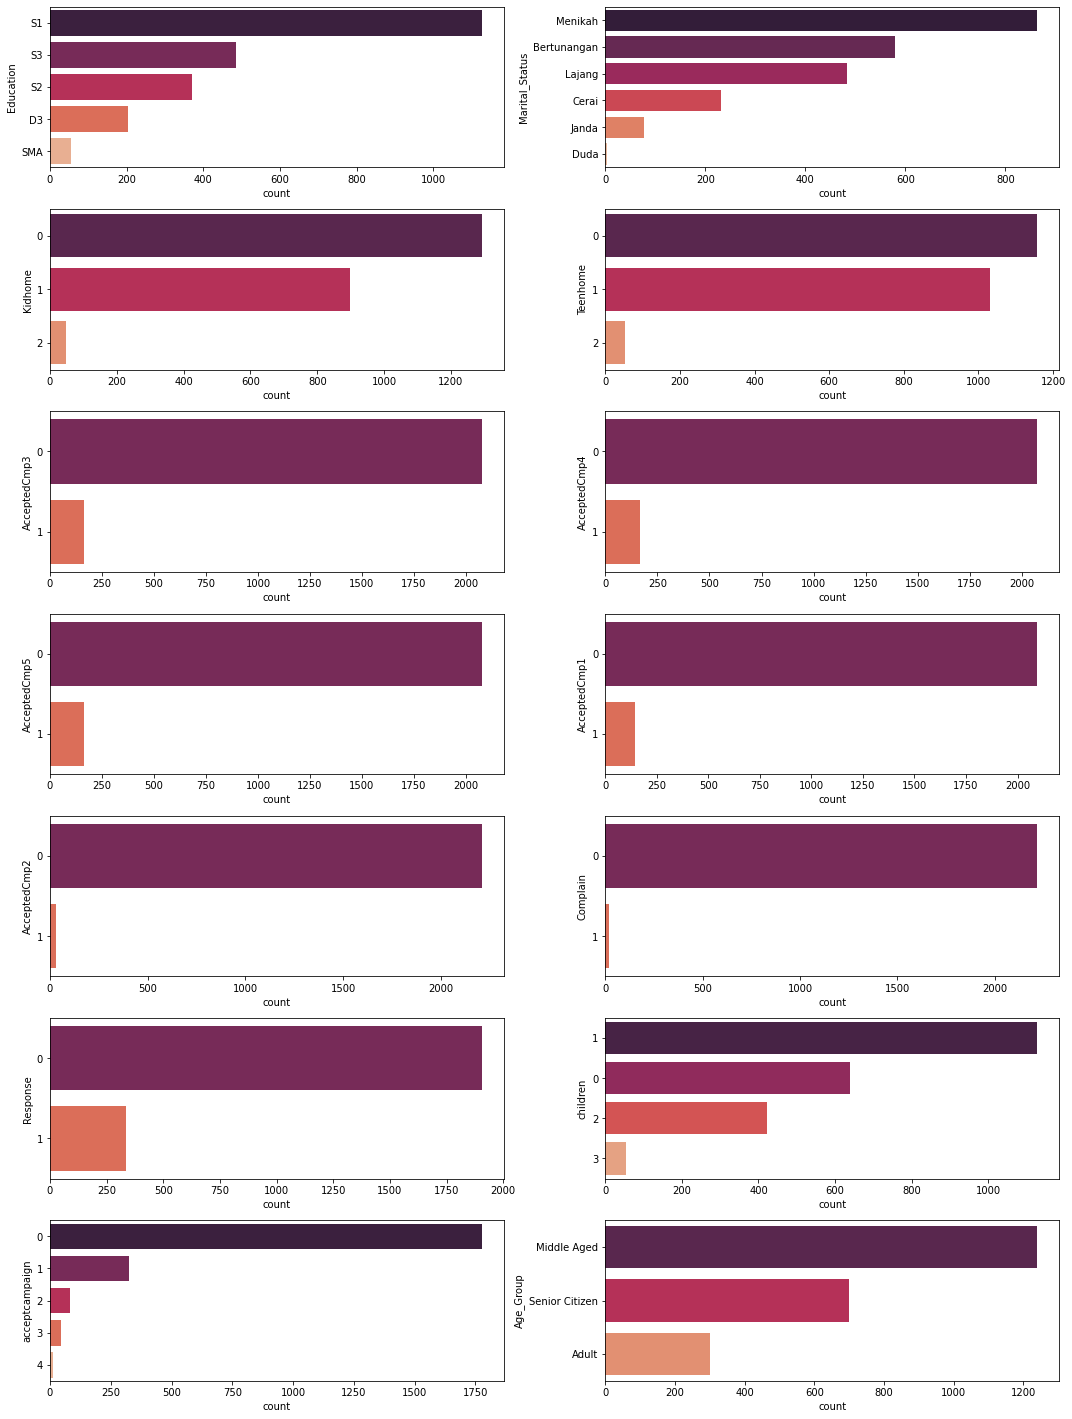

In [16]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(9, 2, i+1)
    sns.countplot(y=cat[i], data=df_eda, palette='rocket', order=df_eda[cat[i]].value_counts().index)
    plt.tight_layout()

## **Multivariate Analysis**

### **Correlaction/Associations Heat Map**

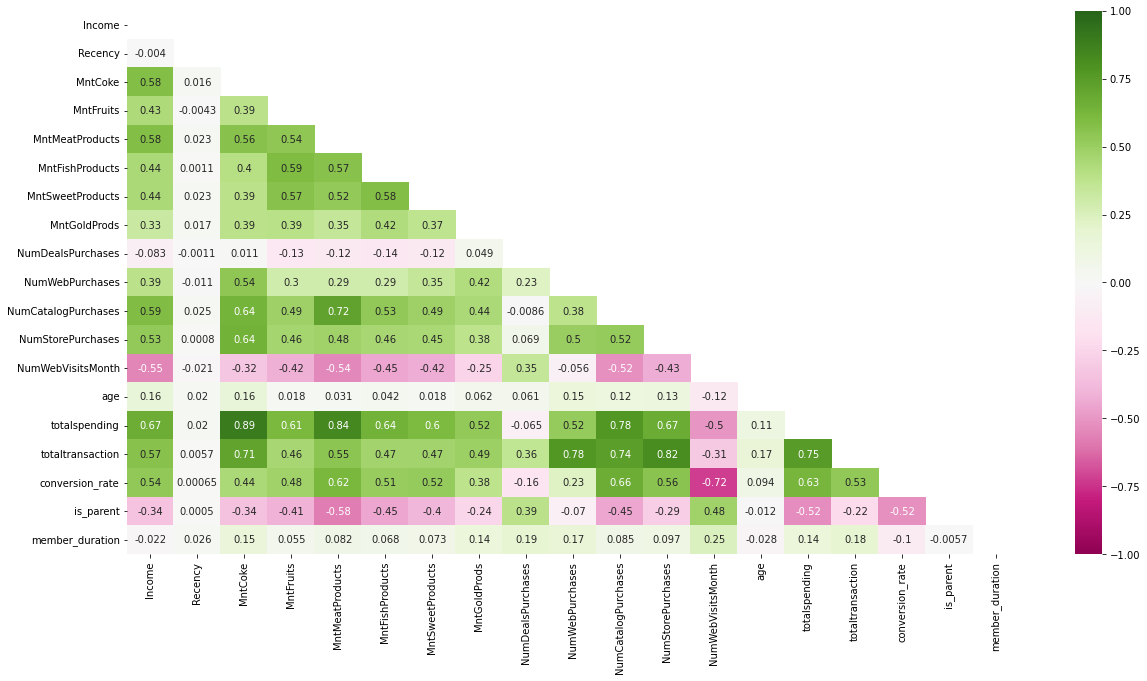

In [17]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_eda.corr(), dtype=np.bool))
sns.heatmap(df_eda.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')

### **Bivariate analysis**

In [18]:
df_task1 = df_eda.groupby('Age_Group').agg({'conversion_rate':'sum'}).reset_index()
df_task1['sum_cvr'] = df_task1['conversion_rate'].sum()
df_task1['pct'] = round((df_task1['conversion_rate']/df_task1['sum_cvr'])*100, 2)
df_task1

,Age_Group,conversion_rate,sum_cvr,pct
0,Adult,1396.827026,9845.297974,14.19
1,Middle Aged,4731.134441,9845.297974,48.05
2,Senior Citizen,3717.336508,9845.297974,37.76


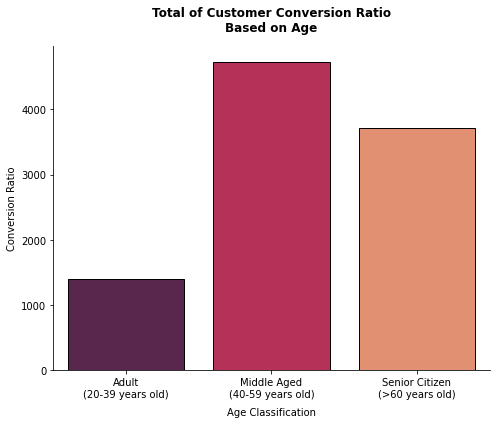

In [19]:
fig, ax = plt.subplots(figsize=(7, 6))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='conversion_rate', data=df_task1, edgecolor='black', palette='rocket')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(20-39 years old)', 'Middle Aged\n(40-59 years old)', 'Senior Citizen\n(>60 years old)'])

sns.despine()
plt.tight_layout()

In [20]:
cats=['Education','Income', 'age', 'Age_Group', 'children', 'totalspending', 'Marital_Status', 'is_parent', 'acceptcampaign','member_duration']

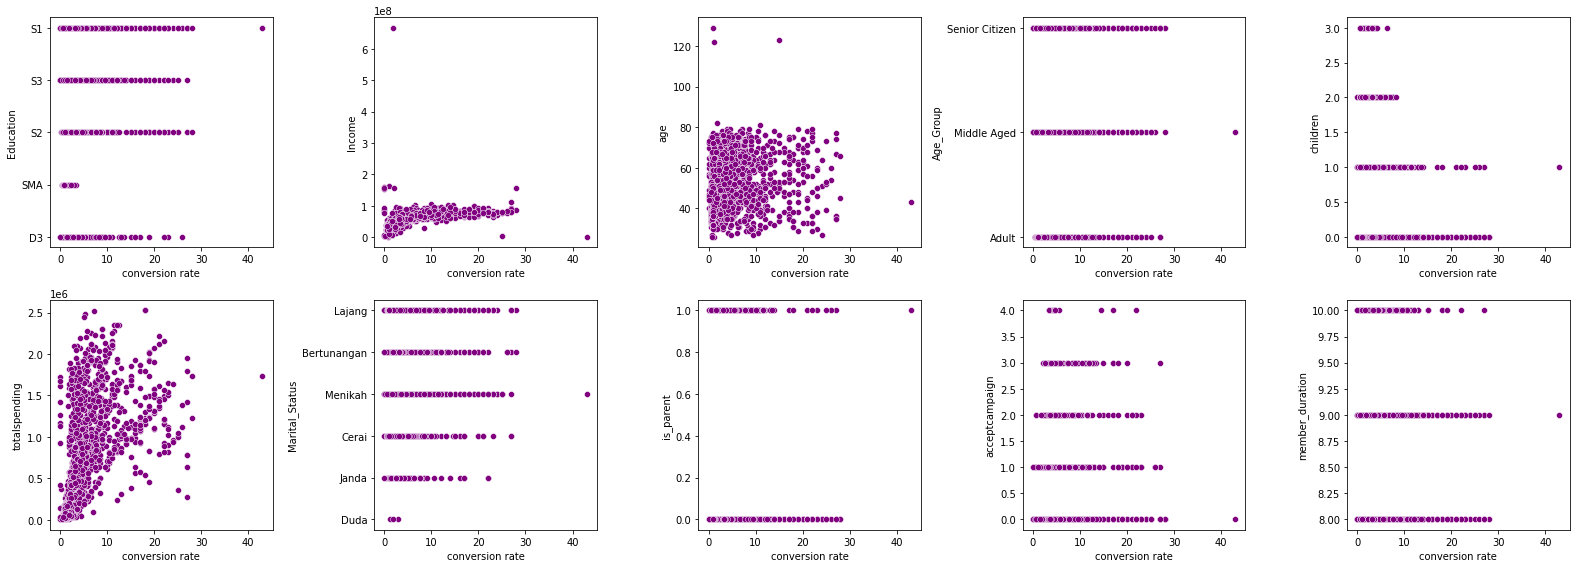

In [21]:
#scatterplot
plt.figure(figsize=(22, 8))
for i in range(0, len(cats)):
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x=df_eda['conversion_rate'], y=df_eda[cats[i]], color='purple')
    plt.xlabel('conversion rate')
    plt.tight_layout()

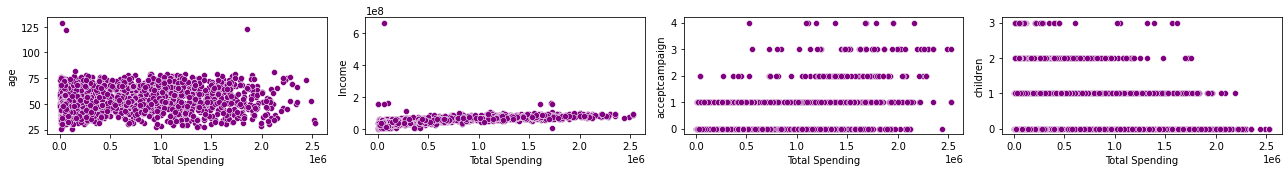

In [22]:
cats2=['age', 'Income', 'acceptcampaign', 'children']
plt.figure(figsize=(18, 2.5))
for i in range(0, len(cats2)):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=df_eda['totalspending'], y=df_eda[cats2[i]], color='purple')
    plt.xlabel('Total Spending')
    plt.tight_layout()

Insight:

- Terdapat korelasi positif linier antara variabel conversion rate dan variabel income. Semakin tinggi income, semakin tinggi conversion rate.
- Terdapat korelasi positif linier antara variabel conversion rate dan variabel total spending. Semakin banyak jumlah yang dibelanjakan, semakin tinggi conversion rate.
- Korelasi antara variabel conversion rate dan age kurang signifikan karena distribusi conversion rate pada variabel age cenderung rata-rata.
- Hubungan antara total spending dengan variabel age juga kurang signifikan karena distribusi total spending variabel age cenderung rata-rata.
- Terdapat korelasi positif linier antara variabel total spending dan variabel income.

# **Data Preprocessing part 2**

## **Handling Missing Value**

In [23]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,24,1.071


In [24]:
#Remove rows that have no income data
df_clean.dropna(subset=['Income'], inplace=True)

## **Handling Duplicated Data**

In [25]:
df_clean.duplicated().sum()

183

In [26]:
df_clean[df_clean.duplicated(keep='first')].head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,age,children,totalspending,totaltransaction,conversion_rate,is_parent,acceptcampaign,member_duration,Age_Group
83,S2,Bertunangan,38620000.0,0,0,2013-11-05,56,112000,17000,44000,...,0,59,0,318000,11,3.666667,0,0,9,Middle Aged
179,D3,Menikah,78497000.0,0,0,2013-01-12,44,207000,26000,447000,...,0,71,0,978000,25,12.500000,0,1,9,Senior Citizen
281,S1,Bertunangan,51369000.0,0,1,2012-10-25,84,297000,7000,79000,...,0,46,1,576000,16,2.000000,1,0,10,Middle Aged
282,S1,Bertunangan,37760000.0,0,0,2012-08-31,20,84000,5000,38000,...,0,76,0,317000,13,1.857143,0,0,10,Senior Citizen
363,S3,Menikah,37717000.0,1,0,2012-11-23,31,9000,0,6000,...,0,44,1,25000,4,0.444444,1,0,10,Middle Aged


In [27]:
df_clean[df_clean.duplicated(keep='last')].head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,Response,age,children,totalspending,totaltransaction,conversion_rate,is_parent,acceptcampaign,member_duration,Age_Group
15,S3,Lajang,82800000.0,0,0,2012-11-24,23,1006000,22000,115000,...,1,76,0,1315000,26,8.666667,0,2,10,Senior Citizen
17,S1,Bertunangan,37760000.0,0,0,2012-08-31,20,84000,5000,38000,...,0,76,0,317000,13,1.857143,0,0,10,Senior Citizen
23,S3,Menikah,65324000.0,0,1,2014-11-01,0,384000,0,102000,...,0,68,1,544000,20,5.000000,1,0,8,Senior Citizen
24,S1,Bertunangan,40689000.0,0,1,2013-03-18,69,270000,3000,27000,...,0,71,1,444000,20,2.500000,1,0,9,Senior Citizen
29,S3,Menikah,84618000.0,0,0,2013-11-22,96,684000,100000,801000,...,0,57,0,1672000,26,13.000000,0,1,9,Middle Aged


Dari pengecekan menggunakan function .duplicated() ditemukan ada 183 data diplikat. Namun, setelah dilakukan pengecekan ulang tidak ditemukan adanya baris yang duuplikat sehingga kita tidak mengeliminasi data apapun.

In [28]:
df_clean.shape

(2216, 34)

# **Feature Engineering**

## **Feature encoding**

In [29]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4}

df_clean['education_mapped'] = df_clean['Education'].map(mapping_education)

In [30]:
# handle dengan one hot encoding
for cat in ['Age_Group', 'Marital_Status']:
    onehots = pd.get_dummies(df_clean[cat], prefix=cat)
    df_clean = df_clean.join(onehots)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Education                   2216 non-null   object        
 1   Marital_Status              2216 non-null   object        
 2   Income                      2216 non-null   float64       
 3   Kidhome                     2216 non-null   int64         
 4   Teenhome                    2216 non-null   int64         
 5   Dt_Customer                 2216 non-null   datetime64[ns]
 6   Recency                     2216 non-null   int64         
 7   MntCoke                     2216 non-null   int64         
 8   MntFruits                   2216 non-null   int64         
 9   MntMeatProducts             2216 non-null   int64         
 10  MntFishProducts             2216 non-null   int64         
 11  MntSweetProducts            2216 non-null   int64       

## **Standardization**

In [32]:
# membagi data berdasarkan type datanya
category = df_clean.select_dtypes(include='object')
numerical = df_clean.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age', 'children', 'totalspending', 'totaltransaction', 'conversion_rate', 'is_parent', 'acceptcampaign', 'member_duration', 'education_mapped', 'Age_Group_Adult', 'Age_Group_Middle Aged', 'Age_Group_Senior Citizen', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai', 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']
Data category:  ['Education', 'Marital_Status', 'Age_Group']


In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df2_scaled = df_clean.copy()

for col in numerical:
    df2_scaled[col] = ss.fit_transform(df2_scaled[[col]])
    
display(df2_scaled.shape, df2_scaled.head(3))

(2216, 44)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,education_mapped,Age_Group_Adult,Age_Group_Middle Aged,Age_Group_Senior Citizen,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,S1,Lajang,0.234063,-0.823039,-0.928972,-1.974875,0.310532,0.978226,1.549429,1.690227,...,-0.457733,-0.39417,-1.114861,1.487143,-0.590553,-0.341958,-0.036819,-0.188452,1.914488,-0.79411
1,S1,Lajang,-0.234559,1.039938,0.909066,1.665141,-0.380509,-0.872024,-0.637328,-0.717986,...,-0.457733,-0.39417,-1.114861,1.487143,-0.590553,-0.341958,-0.036819,-0.188452,1.914488,-0.79411
2,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.172132,-0.795134,0.358511,0.569159,-0.178368,...,-0.457733,-0.39417,0.896973,-0.672430,1.693329,-0.341958,-0.036819,-0.188452,-0.522333,-0.79411


# **Data Modeling**

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Education                   2216 non-null   object        
 1   Marital_Status              2216 non-null   object        
 2   Income                      2216 non-null   float64       
 3   Kidhome                     2216 non-null   int64         
 4   Teenhome                    2216 non-null   int64         
 5   Dt_Customer                 2216 non-null   datetime64[ns]
 6   Recency                     2216 non-null   int64         
 7   MntCoke                     2216 non-null   int64         
 8   MntFruits                   2216 non-null   int64         
 9   MntMeatProducts             2216 non-null   int64         
 10  MntFishProducts             2216 non-null   int64         
 11  MntSweetProducts            2216 non-null   int64       

## **Elbow method**

[4432.000000000001, 1747.451788972653, 1186.929553386113, 766.8128819113267, 553.4036395359587, 463.07805313178085, 386.5690674568556, 327.693450837997, 288.60812539685173]


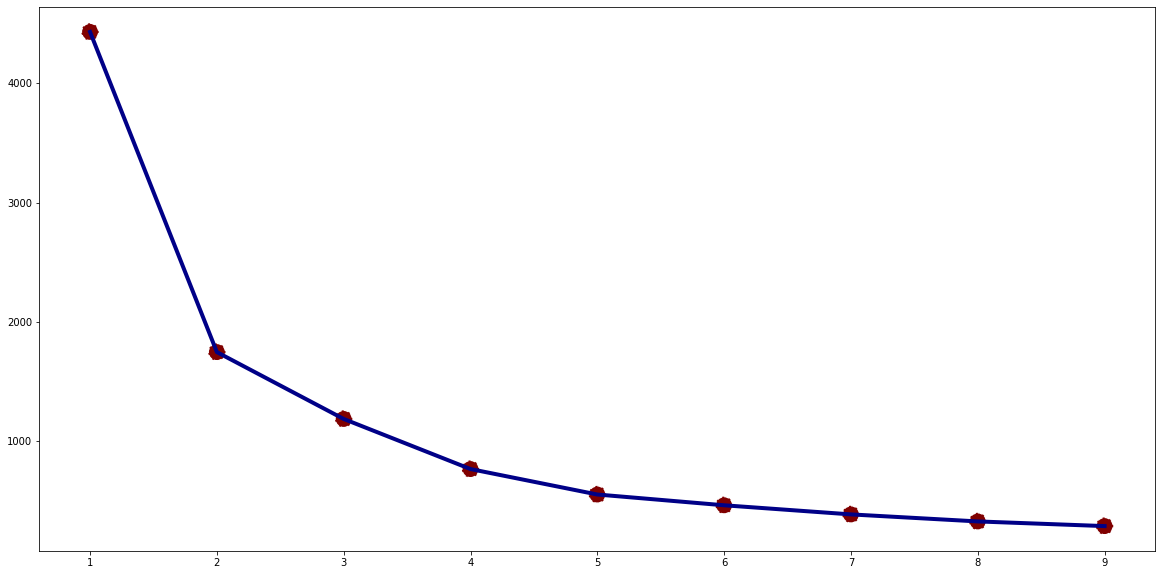

In [35]:
# use elbow method to calculate the best number for clusters
from sklearn.cluster import KMeans

col_model=['Income', 'totalspending']
X=df2_scaled[col_model].copy()
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 10), y=inertia, s=300, color='#800000',  linestyle='--')

The number of optimal cluster according to elbow method = 4

## **Silhouette score**

In [36]:
# silhouette score
import sklearn.metrics as metrics
import sklearn.cluster as cluster

for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6009030288124816
Silhouette score for k(clusters) = 3 is 0.6009030288124816
Silhouette score for k(clusters) = 4 is 0.5003386370305559
Silhouette score for k(clusters) = 5 is 0.4174434334313183
Silhouette score for k(clusters) = 6 is 0.3877823621834045
Silhouette score for k(clusters) = 7 is 0.3941800543660693
Silhouette score for k(clusters) = 8 is 0.3690367176780001
Silhouette score for k(clusters) = 9 is 0.3833070687997216
Silhouette score for k(clusters) = 10 is 0.3716337646241542


In [37]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,11)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=200)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

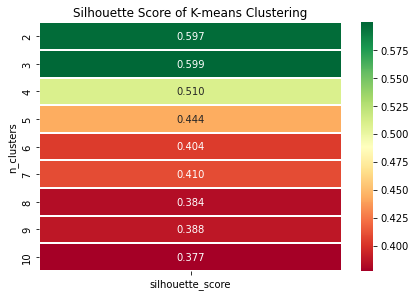

In [38]:
visualize_silhouette_layer(X)

Berdasarkan sillhouette score, angka tertinggi terdapat pada 3 cluster

In [39]:
kmeans = KMeans (n_clusters = 4, random_state = 24)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df_clean['cluster'] = kmeans.labels_

In [40]:
display(df_clean.groupby('cluster')['totalspending','Income'].agg(['count','mean']))

totalspending               Income              
                count          mean  count          mean
cluster                                                 
0                 453  1.570322e+06    453  7.815928e+07
1                1122  1.258191e+05   1122  3.478553e+07
2                 640  7.698312e+05    640  6.355894e+07
3                   1  6.200000e+04      1  6.666660e+08

Based on silhouette score, the highest score is 3 and 4 clusters. After further analysis, the 4th cluster have unsuitable distribution and value which most likely to be an outlier. Therefore, we decided to drop the 4th cluster. The final number of cluster is 3.

In [41]:
df_clean = df_clean[df_clean.cluster != 3]

# **Interpretasi/Insight**

Pada case clusterifikasi customer ini, Kita fokus pada fitur Total_spent dan Income. Sehingga, kita perlu mengagregasi terlebih dahulu Total_spent dan Income tiap cluster untuk mendapatkan informasi statistik dari tiap cluster.

## **Whats the total members of each cluster?**

Total members of each cluster :
1    1122
2     640
0     453
Name: cluster, dtype: int64
**************************************************


Text(0.5, 1.0, 'Total members of each cluster')

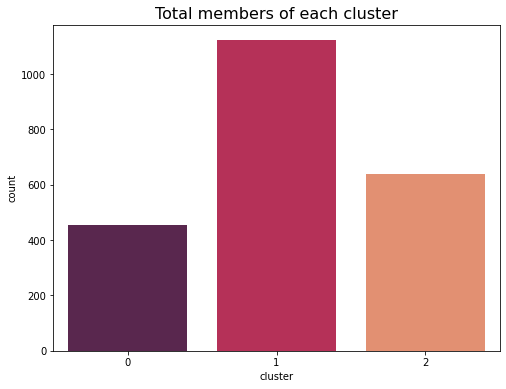

In [42]:
cprint('Total members of each cluster :','green')
print(df_clean['cluster'].value_counts())
cprint('*'*50,'green')
plt.rcParams['figure.figsize'] = (8, 6)
countcluster=sns.countplot(x='cluster', data=df_clean,palette='rocket')
countcluster.set_title('Total members of each cluster',fontsize=16)

## **What is the spent of the members of each cluster compared to their income?**

In [43]:
df_based_cluster = df_clean.groupby(['cluster']).agg({'totalspending': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max'],
                                                'conversion_rate':['count', 'mean', 'median', 'min', 'max']
                                                 }).reset_index()
df_based_cluster

cluster totalspending                                            Income  \
                  count          mean     median      min      max  count   
0       0           453  1.570322e+06  1528000.0  1024000  2525000    453   
1       1          1122  1.258191e+05    70000.0     5000   835000   1122   
2       2           640  7.698312e+05   794000.0     6000  1730000    640   

                                                     conversion_rate  \
           mean      median         min          max           count   
0  7.815928e+07  77972000.0  48192000.0  160803000.0             453   
1  3.478553e+07  35683000.0   1730000.0   61917000.0            1122   
2  6.355894e+07  62559500.0   2447000.0  162397000.0             640   

                                  
       mean    median  min   max  
0  9.296997  7.666667  0.0  28.0  
1  1.510286  1.250000  0.0  25.0  
2  5.971874  4.585714  0.0  43.0

               Income  totalspending
cluster                             
0        3.540616e+10      711356000
1        3.902937e+10      141169000
2        4.067772e+10      492692000
**************************************************


Text(0.5, 1.0, 'Income vs Spent of each cluster')

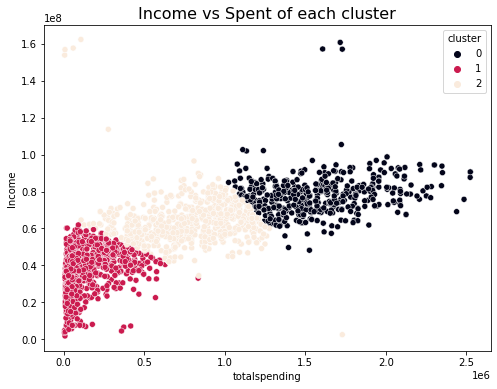

In [44]:
# sum Income,TotslSpent in each Cluster
print(df_clean.groupby(['cluster'])['Income','totalspending'].agg('sum'))
cprint('*'*50,'green')
spentscatter = sns.scatterplot(data = df_clean,x=df_clean["totalspending"], y=df_clean["Income"],hue=df_clean["cluster"], palette= 'rocket')
spentscatter.set_title('Income vs Spent of each cluster',fontsize=16)

Text(0.5, 1.0, 'Money Spent In Each Cluster')

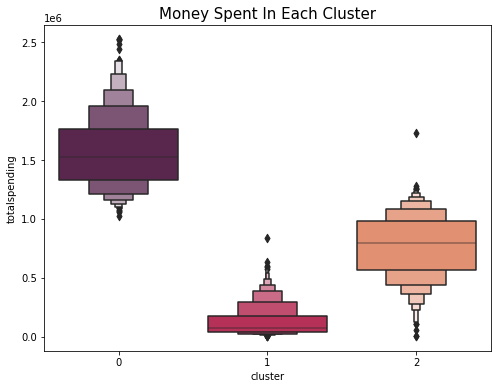

In [45]:
spentbox =sns.boxenplot(x=df_clean["cluster"], y=df_clean["totalspending"], palette= 'rocket')
spentbox.set_title("Money Spent In Each Cluster", size=15)

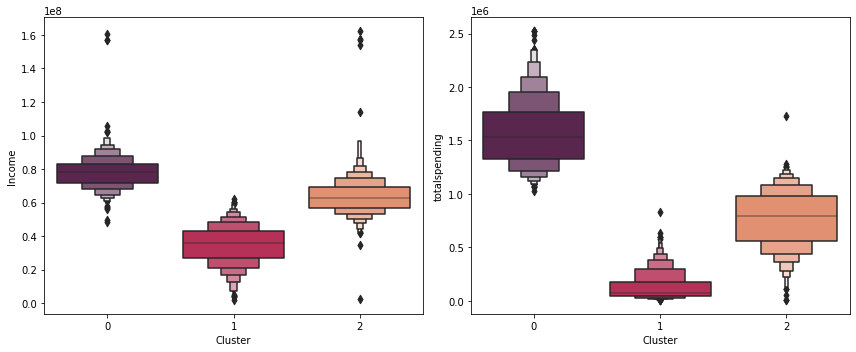

In [46]:
#boxplot

cluster_cats=['Income','totalspending']
plt.figure(figsize=(12, 5))
for i in range(0, len(cluster_cats)):
    plt.subplot(1, 2, i+1)
    sns.boxenplot(x=df_clean['cluster'], y=df_clean[cluster_cats[i]],palette='rocket')
    plt.xlabel('Cluster')
    plt.tight_layout()

## **The members of which cluster accepted more offer in the campaigns?**

cluster  acceptcampaign
0        0                  227
         1                  117
         2                   62
         3                   38
         4                    9
1        0                 1019
         1                   98
         2                    5
2        0                  510
         1                  108
         2                   14
         3                    6
         4                    2
dtype: int64
**************************************************


Text(0.5, 1.0, 'Accepted Promotions In Each Cluster')

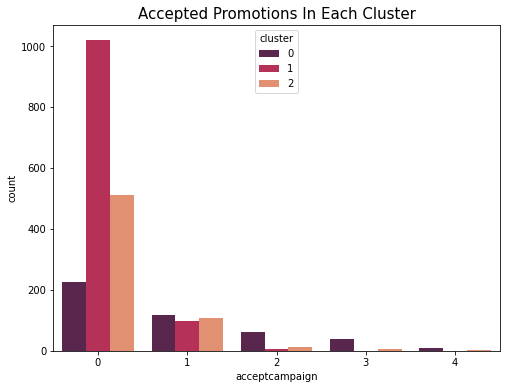

In [47]:
# Num of TotalPromotions in each cluster
print(df_clean.groupby(['cluster', 'acceptcampaign']).size())
cprint('*'*50,'green')
totalPromotioncount = sns.countplot(x=df_clean['acceptcampaign'],hue=df_clean['cluster'], palette= 'rocket')
totalPromotioncount.set_title("Accepted Promotions In Each Cluster", size=15)

## **Are they paarents and if they are number of children for each cluster?**

cluster  children
0        0           337
         1           103
         2             9
         3             4
1        0           140
         1           628
         2           316
         3            38
2        0           156
         1           385
         2            91
         3             8
dtype: int64
**************************************************


Text(0.5, 1.0, 'Num of Children In Each Cluster')

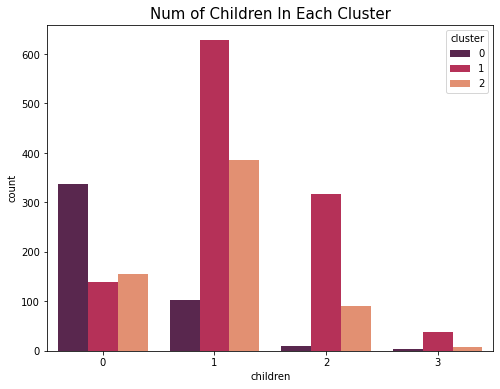

In [48]:
# Num of Children in each cluster
print(df_clean.groupby(['cluster','children']).size())
cprint('*'*50,'green')
familySizecount = sns.countplot(x=df_clean['children'],hue=df_clean['cluster'], palette= 'rocket')
familySizecount.set_title("Num of Children In Each Cluster", size=15)

## **Number of purchases in each cluster ?**

cluster
0    1468
1    7326
2    2987
Name: NumWebVisitsMonth, dtype: int64


Text(0.5, 1.0, 'Total Web Visit In Each Clusters')

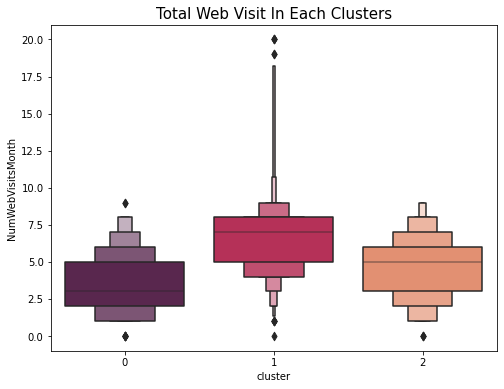

In [49]:
print(df_clean.groupby(['cluster'])['NumWebVisitsMonth'].agg('sum'))
purchasesbox=sns.boxenplot(x=df_clean["cluster"], y=df_clean["NumWebVisitsMonth"], palette='rocket')
purchasesbox.set_title("Total Web Visit In Each Clusters", size=15)

## **How is marital status in each cluster ?**

cluster  Marital_Status
0        Bertunangan       113
         Cerai              45
         Janda              17
         Lajang            113
         Menikah           165
1        Bertunangan       292
         Cerai             111
         Duda                2
         Janda              29
         Lajang            254
         Menikah           434
2        Bertunangan       167
         Cerai              76
         Duda                1
         Janda              30
         Lajang            108
         Menikah           258
dtype: int64
**************************************************


Text(0.5, 1.0, 'Marital Status In Each Cluster')

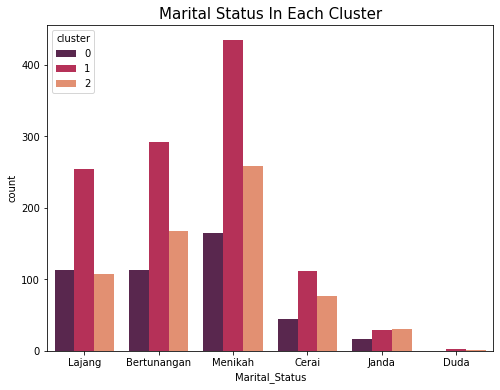

In [50]:
print(df_clean.groupby(['cluster', 'Marital_Status']).size())
cprint('*'*50,'green')
maritalcount = sns.countplot(x=df_clean['Marital_Status'],hue=df_clean["cluster"], palette= 'rocket')
maritalcount.set_title("Marital Status In Each Cluster", size=15)

## **Age per Cluster**

cluster  Age_Group     
0        Adult              76
         Middle Aged       207
         Senior Citizen    170
1        Adult             186
         Middle Aged       673
         Senior Citizen    263
2        Adult              36
         Middle Aged       347
         Senior Citizen    257
dtype: int64
**************************************************


([<matplotlib.axis.XTick at 0x7f01eb8f1390>,
 [Text(0, 0, 'Adult\n(20-39 years old)'),
  Text(0, 0, 'Middle Aged\n(40-59 years old)'),
  Text(0, 0, 'Senior Citizen\n(>60 years old)')])

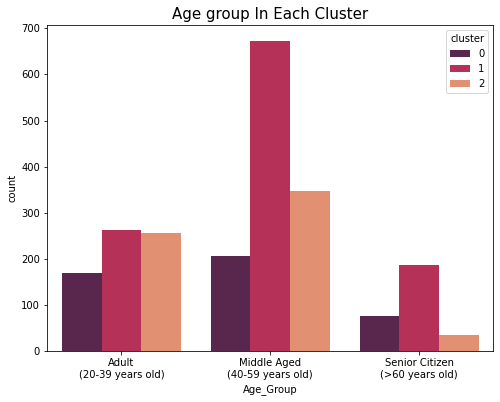

In [51]:
print(df_clean.groupby(['cluster', 'Age_Group']).size())
cprint('*'*50,'green')
maritalcount = sns.countplot(x=df_clean['Age_Group'],hue=df_clean["cluster"], palette= 'rocket')
maritalcount.set_title("Age group In Each Cluster", size=15)
plt.xticks(np.arange(3), ['Adult\n(20-39 years old)', 'Middle Aged\n(40-59 years old)', 'Senior Citizen\n(>60 years old)'])

## **What is the status of each cluster in terms of education ?**

cluster  Education
0        D3            30
         S1           236
         S2            71
         S3           116
1        D3           117
         S1           551
         S2           189
         S3           212
         SMA           53
2        D3            53
         S1           328
         S2           105
         S3           153
         SMA            1
dtype: int64
**************************************************


Text(0.5, 1.0, 'Marital Status In Each Cluster')

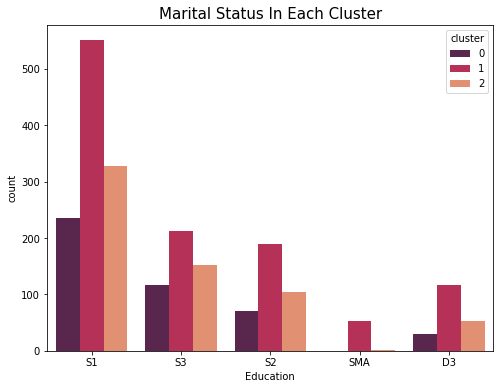

In [52]:
print(df_clean.groupby(['cluster', 'Education']).size())
cprint('*'*50,'green')
maritalcount = sns.countplot(x=df_clean['Education'],hue=df_clean["cluster"], palette= 'rocket')
maritalcount.set_title("Marital Status In Each Cluster", size=15)

## **Customer based on Purchasing history**

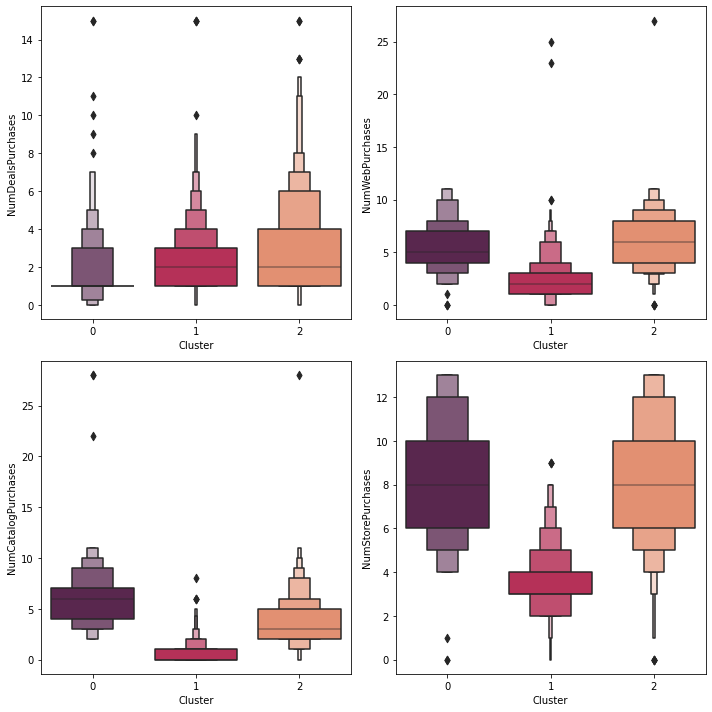

In [53]:
#boxplot

purchase_cats=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10, 10))
for i in range(0, len(purchase_cats)):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x=df_clean['cluster'], y=df_clean[purchase_cats[i]],palette='rocket')
    plt.xlabel('Cluster')
    plt.tight_layout()

# **Profiling Customers & Summarizing Report**

- Cluster 0 :
  - Didominasi oleh Middle Aged berusia 40-59 tahun berstatus menikah (namun memiliki angka tinggi dalam status lajang dan bertungan) dan mayoritas tidak memiliki anak
  - Setidaknya dapat menerima 1 hingga 4 campaign
  - Jumlah pembelian melalui web sekitar 5 kali walaupun dengan jumlah visit web terendah
  - Memiliki history pembelian terbanyak pada catalog & store sekitar 8 kali pembelian
  - Memiliki income tertinggi dan total spending tertinggi.

- Cluster 1 :
  - Didominasi oleh Middle Aged berusia 40-59 tahun berstatus menikah dan mayoritas memiliki 1 anak atau lebih
  - Cenderung tidak memiliki ketertarikan dalam menerima campaign
  - Memiliki angka jumlah visit web terbanyak (6 kali) namun history pembelian melalui web hanya sekitar 2 kali
  - Memiliki history pembelian menggunakan deals setidaknya 2 kali perbulan
  - Memiliki income dan total spending terendah


- Cluster 2 :
  - Didominasi oleh Middle Aged berusia 40-59 tahun berstatus menikah dan setidaknya memiliki 1 anak.
  - Memiliki ketertarikan yang rendah dalam menerima campaign setidaknya 1 campaign
  - Memiliki history pembelian terbanyak pada web sekitar 6 kali pembelian walaupun hanya memiliki angka web visit sekitar 4-5 kali per bulan
  - Menggunakan deals setidaknya 2 kali dalam sebulan
  - Memiliki income dan total spending diantara ketiga cluster


# **Business Recommendation**

- Meningkatkan pelayanan pada store karena kebnyakan customer melaukan pembelian melalui store
- Cluster low spender dan paling beresiko untuk churn. Dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction. Mereka mempunyai jumlah visit yang paling tinggi tapi jarang melakukan transaksi. Hal ini dapat disebabkan oleh category product yang kurang, harga yang kurang cocok, biaya jasa kirim atau biaya sevice di platform yang tinggi, dll.’
- Karena cluster 1 (low spender) memiliki pengeluaran yang kecil, kita perlu membuat personalize ads, promosi atau campaign dengan produk yang murah/memiliki harga rendah melalui web yang dapat menarik cluster ini berbelanja di platform kita.
- Membuat membership program dengan 3 tingkatan berdasarkan cluster (Gold= High spender, Silver=Mid spender, Bronze= Low Spender) dengan previlages yang berbeda ditiap tingkatannya. Harapannya program ini dapa tmembuat customer lebih sering berbelanja.


# **Potential impact**

In [54]:
pot = df_clean.groupby('cluster')['totalspending'].agg(['sum']).reset_index()
pot

,cluster,sum
0,0,711356000
1,1,141169000
2,2,492692000


In [55]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df_clean[df_clean.cluster == 2].totalspending.sum() / df_clean[df_clean.cluster == 2].totaltransaction.sum()) * df_clean[df_clean.cluster == 2].NumDealsPurchases.sum()

70405646.23100533

- Berdasarkan hasil analisis target akan lebih focus pada high spender dan mid spender yang memiliki pendapat tinggi sehingga lebih potensial melakukan pembelian lebih banyak
- High spender memiliki potensi GMV Rp. 711.356.000
- Mid spender memiliki potensi GMV Rp. 492.692.000
- jumlah cost yang dapat di save jika kita melakukan optimisasi promo di mid spender (asumsi: target reduce 50%) adalah Rp. 70.405.646
